# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib. pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
url = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/560_bodyfat/560_bodyfat.tsv.gz"

df = pd.read_csv(url, sep="\t")
df = df.dropna()

# Show a random sample of 10 rows
print(df.sample(10, random_state=42))

     Density   Age  Weight  Height       Neck       Chest     Abdomen  \
165   1.0549  35.0  217.00   73.75  40.500000  107.500000   95.099998   
6     1.0549  26.0  181.00   69.75  36.400002  105.099998   90.699997   
111   1.0355  43.0  183.25   70.00  37.099998  108.000000  105.000000   
172   1.0521  35.0  177.25   71.00  38.400002  100.500000   90.300003   
115   1.0607  40.0  158.00   69.25  36.299999   97.000000   86.599998   
183   1.0713  40.0  159.25   69.75  35.299999   92.300003   86.800003   
199   1.0462  43.0  170.75   67.50  37.400002  103.699997   89.699997   
235   1.0563  62.0  168.75   67.50  38.299999  104.699997   95.599998   
9     1.0722  23.0  198.25   73.50  42.099998   99.599998   88.599998   
30    1.0716  32.0  182.00   73.75  38.700001  100.500000   88.699997   

            Hip      Thigh       Knee      Ankle     Biceps    Forearm  \
165  104.500000  64.800003  41.299999  25.600000  36.400002  33.700001   
6    100.300003  58.400002  38.299999  22.900000

 * For this problem, I selected the Body Fat dataset from the PMLB repository. The dataset was imported directly from the PMLB GitHub source using a tab separated values (TSV) file. After loading the data, I removed any rows containing missing values to ensure that subsequent analyses and model building steps rely on complete and reliable observations. To confirm that the dataset loaded correctly and to obtain an overview of its structure, I displayed a random sample of ten rows using Pandas’ .sample() function. This sample provides an initial sense of the variable types, scales, and potential relationships that may be explored in later problems.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    float64
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  target   252 non-null    float64
dtypes: float64(15)
memory usage: 31.5 KB


YOUR ANSWERS HERE

* This dataset contains 252 complete observations and 15 numerical variables, all stored as float64. There are no missing values, so the data is ready for analysis without additional cleaning. The predictors include body measurements such as Density, Weight, Height, and various circumference metrics, all of which are commonly used to estimate body composition. The final column, target, represents the body fat percentage that we will predict in later problems. Overall, the dataset is clean, well-structured, and appropriate for regression modeling.

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [13]:
# YOUR CODE HERE

# List all columns in the dataset

columns = df.columns.tolist()
print("Columns in the Body Fat dataset:")
for col in columns:
    print(col)

# Define professional descriptions for each column

column_descriptions = {
    "Density": "A quantitative measure of body density reflecting the relationship between fat mass and lean tissue.",
    "Age": "The age of the individual expressed in years.",
    "Weight": "The total body mass of the individual.",
    "Height": "The measured stature of the individual.",
    "Neck": "A measurement describing the size of the neck region.",
    "Chest": "A measurement describing the size of the chest region of the torso.",
    "Abdomen": "A measurement describing the size of the abdominal (waist) region, which is a strong indicator of body fat accumulation.",
    "Hip": "A measurement describing the size of the hip region.",
    "Thigh": "A measurement describing the size of the upper leg region.",
    "Knee": "A measurement describing the size of the knee region.",
    "Ankle": "A measurement describing the size of the ankle region.",
    "Biceps": "A measurement describing the size of the upper arm in the biceps region.",
    "Forearm": "A measurement describing the size of the forearm region.",
    "Wrist": "A measurement describing the size of the wrist region.",
    "target": "The dependent variable representing the individual’s body fat percentage and serving as the prediction target for regression models."
}

# Print column descriptions

print("\nColumn descriptions:")
for col, desc in column_descriptions.items():
    print(f"{col}: {desc}")


Columns in the Body Fat dataset:
Density
Age
Weight
Height
Neck
Chest
Abdomen
Hip
Thigh
Knee
Ankle
Biceps
Forearm
Wrist
target

Column descriptions:
Density: A quantitative measure of body density reflecting the relationship between fat mass and lean tissue.
Age: The age of the individual expressed in years.
Weight: The total body mass of the individual.
Height: The measured stature of the individual.
Neck: A measurement describing the size of the neck region.
Chest: A measurement describing the size of the chest region of the torso.
Abdomen: A measurement describing the size of the abdominal (waist) region, which is a strong indicator of body fat accumulation.
Hip: A measurement describing the size of the hip region.
Thigh: A measurement describing the size of the upper leg region.
Knee: A measurement describing the size of the knee region.
Ankle: A measurement describing the size of the ankle region.
Biceps: A measurement describing the size of the upper arm in the biceps region.
For

YOUR ANSWERS HERE

* The Body Fat dataset contains fifteen numerical variables representing a combination of body composition measurements and anthropometric circumferences. These include body density, age, weight, height, and several circumference measurements such as neck, chest, abdomen, hip, thigh, knee, ankle, biceps, forearm, and wrist. Each variable reflects a physical attribute commonly used in clinical or fitness assessments to estimate body fat levels. The final column, labeled “target,” represents the estimated body fat percentage calculated from density measurements. Together, these features provide a comprehensive set of predictors well suited for regression-based modeling of body fat composition.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

Dataset shape: (252, 15)

Dataset columns:
 ['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'target']

Summary statistics:
           Density         Age      Weight      Height        Neck       Chest  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   44.884921  178.924405   70.148810   37.992064  100.824206   
std      0.019031   12.602040   29.389160    3.662856    2.430913    8.430476   
min      0.995000   22.000000  118.500000   29.500000   31.100000   79.300003   
25%      1.041400   35.750000  159.000000   68.250000   36.400002   94.350000   
50%      1.054900   43.000000  176.500000   70.000000   38.000000   99.649998   
75%      1.070400   54.000000  197.000000   72.250000   39.425001  105.375002   
max      1.108900   81.000000  363.149994   77.750000   51.200001  136.199997   

          Abdomen         Hip       Thigh        Knee       Ankl

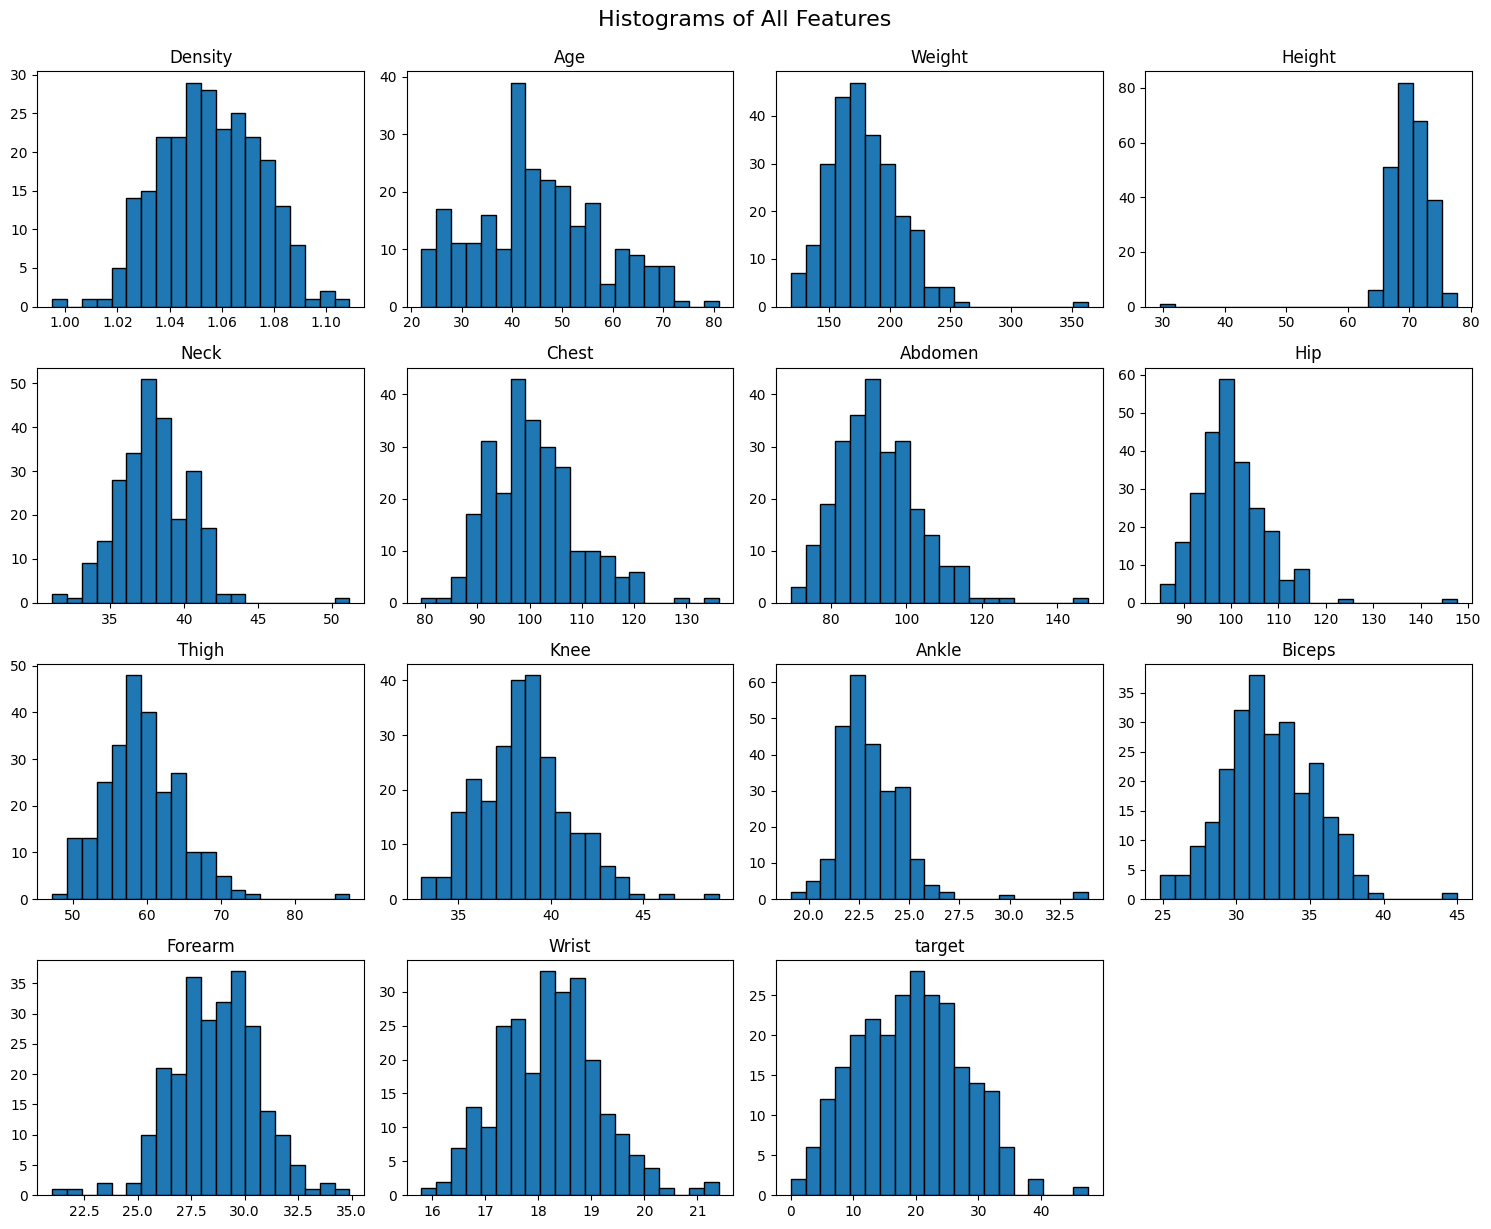

Explanation: Histograms show the distribution of each variable. Some features are approximately normal, while others show skewness and possible outliers.

part 3: Scatter plots of all features vs target


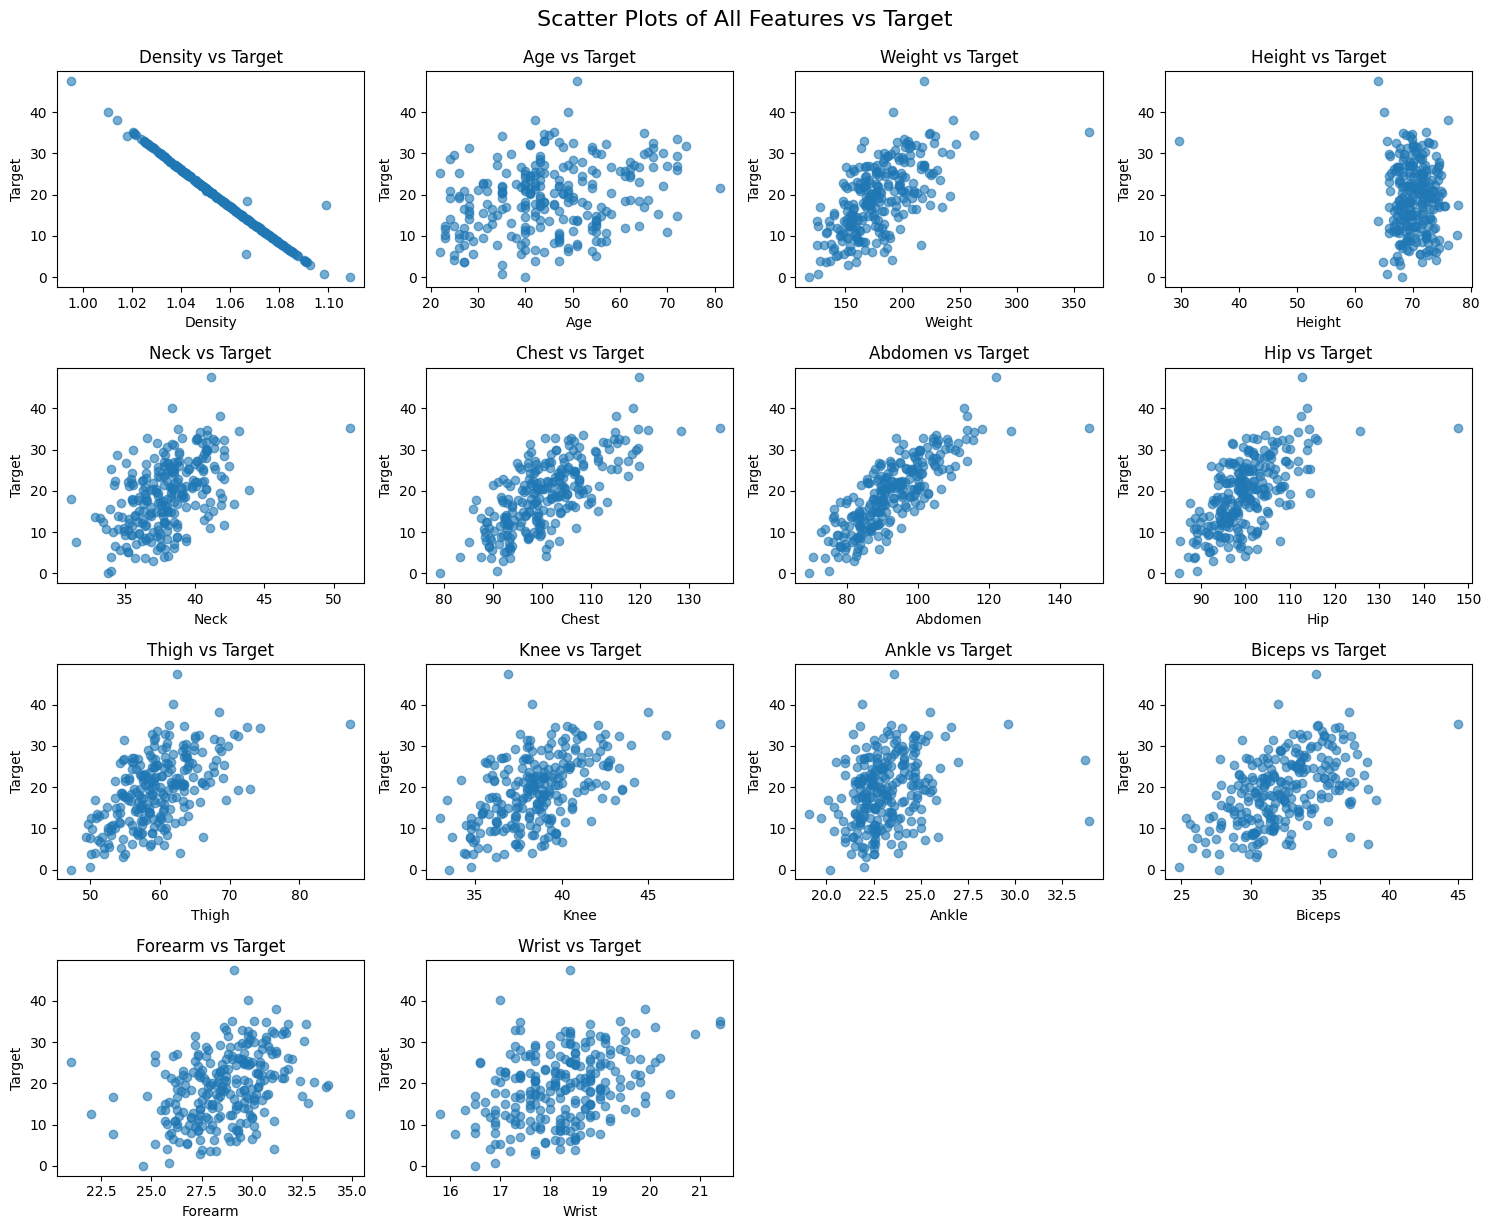

Explanation: These scatter plots show how each feature relates to the target. Features such as Abdomen, Weight, and Chest show strong positive relationships.


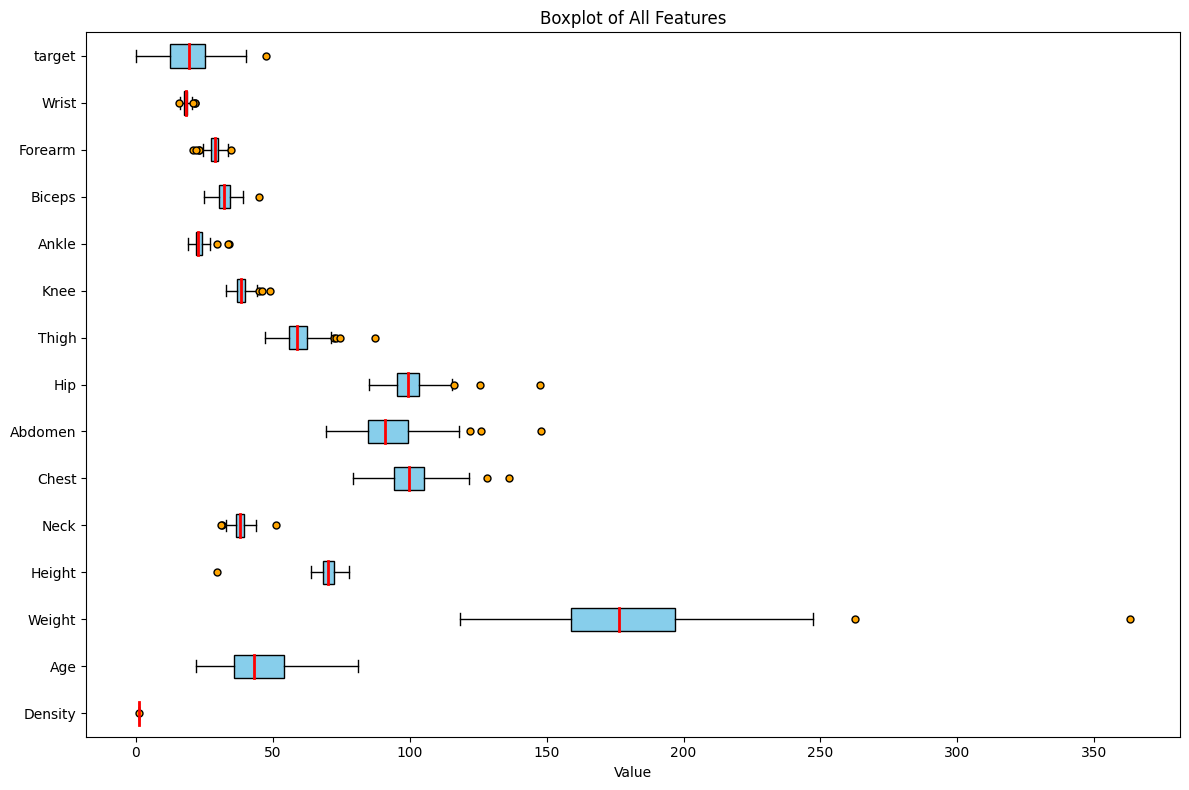


part 5: Correlation matrix


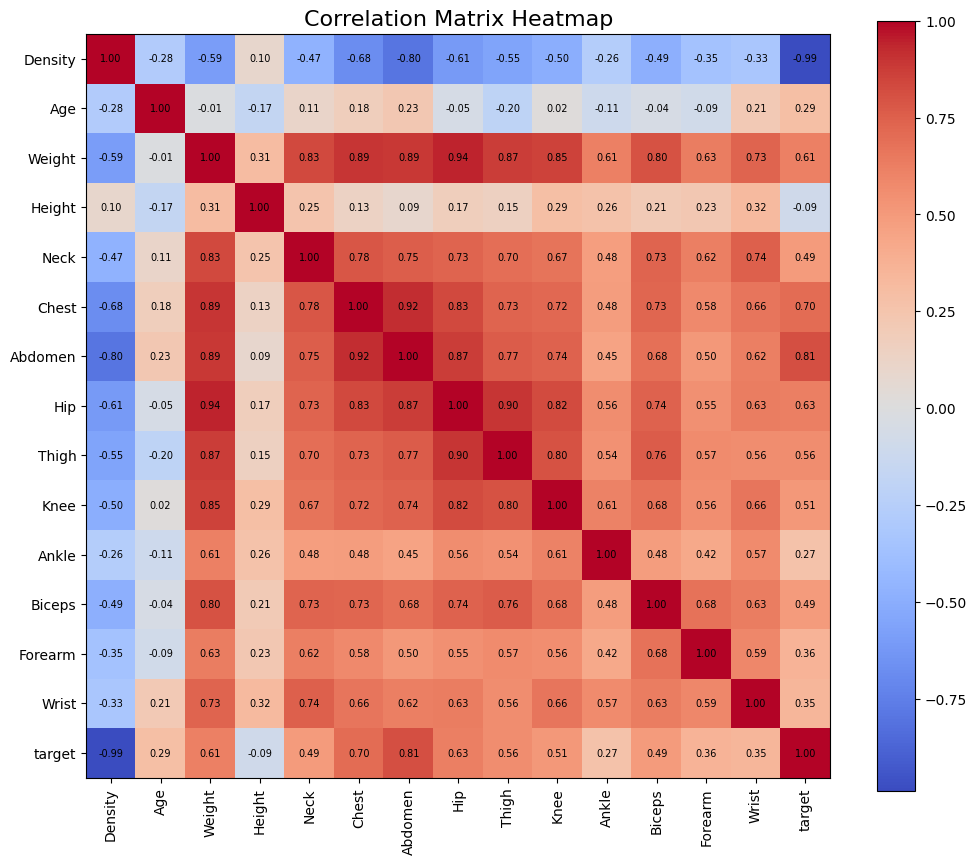

Explanation: The correlation matrix shows that Abdomen, Weight, and Chest have the strongest positive correlations with the target variable.

part 6: Scatter plot with line of best fit (Abdomen vs Target)


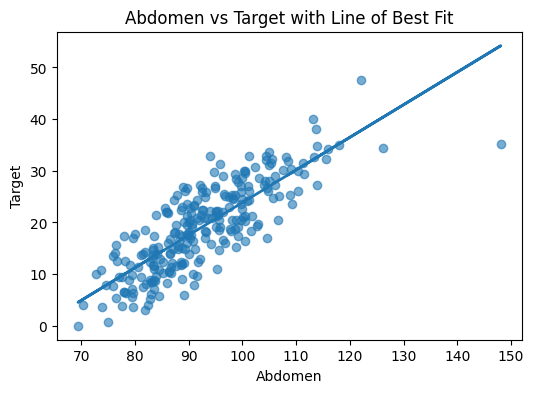

Explanation: Abdomen shows a strong positive linear relationship with the target, making it an important predictor.

Boxplot of Abdomen Measurement


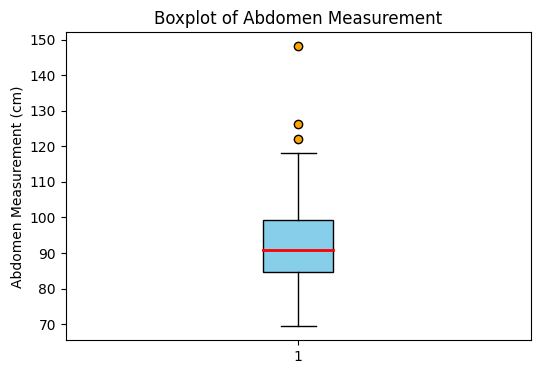

Explanation: This box plot shows the distribution of abdomen measurements, including the median, interquartile range, and outliers. Abdomen has several high-value outliers, but overall shows a relatively compact spread, supporting its strong predictive relationship with body fat percentage.


In [6]:
# YOUR CODE HERE




# part 1 : basic information

print("Dataset shape:", df.shape)
print("\nDataset columns:\n", df.columns.tolist())
print("\nSummary statistics:\n", df.describe())


# part 2 : Histograms of all features

print("\npart 2: Histograms of all features")

plt.figure(figsize=(15,12))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(col)

plt.tight_layout()
plt.suptitle("Histograms of All Features", fontsize=16, y=1.02)
plt.show()

print("Explanation: Histograms show the distribution of each variable. Some features are approximately normal, while others show skewness and possible outliers.")


# part 3 : Scatter plots (ALL features vs target)

print("\npart 3: Scatter plots of all features vs target")

features = df.drop(columns=['target']).columns
target = df['target']

plt.figure(figsize=(15,12))
for i, col in enumerate(features):
    plt.subplot(4, 4, i + 1)
    plt.scatter(df[col], target, alpha=0.6)
    plt.xlabel(col)
    plt.ylabel("Target")
    plt.title(f"{col} vs Target")

plt.tight_layout()
plt.suptitle("Scatter Plots of All Features vs Target", fontsize=16, y=1.02)
plt.show()

print("Explanation: These scatter plots show how each feature relates to the target. Features such as Abdomen, Weight, and Chest show strong positive relationships.")


# part 4 : Boxplots of all features

plt.figure(figsize=(12,8))
plt.boxplot(df.values,
            patch_artist=True,
            boxprops=dict(facecolor='skyblue'),
            medianprops=dict(color='red', linewidth=2),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=5),
            vert=False)  # horizontal

plt.yticks(ticks=range(1, len(df.columns)+1), labels=df.columns)
plt.xlabel("Value")
plt.title("Boxplot of All Features")
plt.tight_layout()
plt.show()


# part 5 : Correlation matrix

print("\npart 5: Correlation matrix")

corr_matrix = df.corr()

plt.figure(figsize=(12,10))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Matrix Heatmap", fontsize=16)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', fontsize=7)

plt.show()

print("Explanation: The correlation matrix shows that Abdomen, Weight, and Chest have the strongest positive correlations with the target variable.")


# part 6 : Scatter plot with line of best fit (Abdomen vs Target)

print("\npart 6: Scatter plot with line of best fit (Abdomen vs Target)")

x = df['Abdomen']
y = df['target']

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
line = slope * x + intercept

plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.6)
plt.plot(x, line, linewidth=2)
plt.xlabel("Abdomen")
plt.ylabel("Target")
plt.title("Abdomen vs Target with Line of Best Fit")
plt.show()

print("Explanation: Abdomen shows a strong positive linear relationship with the target, making it an important predictor.")


# part 7 : Box plot of Abdomen

print("\nBoxplot of Abdomen Measurement")

plt.figure(figsize=(6,4))
plt.boxplot(df['Abdomen'], patch_artist=True,
            boxprops=dict(facecolor='skyblue'),
            medianprops=dict(color='red', linewidth=2),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=6))

plt.ylabel("Abdomen Measurement (cm)")
plt.title("Boxplot of Abdomen Measurement")
plt.show()

print("Explanation: This box plot shows the distribution of abdomen measurements, including the median, interquartile range, and outliers. Abdomen has several high-value outliers, but overall shows a relatively compact spread, supporting its strong predictive relationship with body fat percentage.")







YOUR ANSWERS HERE

* My explanations for each part:
Part 1: The Body Fat dataset contains 252 observations and 15 continuous features, including anthropometric measurements and the body fat percentage target. Summary statistics provide insight into central tendency, variability, and feature ranges, confirming there are no missing values and highlighting potential outliers for further analysis.

Part 2: Histograms of all features illustrate their distributions. While many features approximate a normal distribution, some show skewness and potential outliers, indicating that transformations or robust modeling might be necessary for accurate predictions.

Part 3: Scatter plots of all features versus the target variable reveal relationships with body fat percentage. Features such as Abdomen, Weight, and Chest demonstrate strong positive correlations with the target, indicating they are likely important predictors.

Part 4: Boxplots of all features provide a concise summary of distribution, median, interquartile range, and outliers. Abdomen, Weight, and Chest show noticeable high-value outliers, which could influence predictive models if not properly addressed.

Part 5: The correlation matrix quantifies linear relationships between features and the target. Abdomen, Weight, and Chest have the strongest positive correlations, confirming their predictive relevance. Annotated values on the heatmap enhance interpretability and guide feature selection.

Part 6: A scatter plot of Abdomen versus the target with a line of best fit confirms a strong positive linear relationship. This reinforces Abdomen as a key predictor for body fat percentage and visually validates its relevance in regression modeling.

Part 7: The boxplot of Abdomen highlights median, interquartile range, and high-value outliers. Despite these outliers, the feature maintains a relatively compact spread, supporting its strong predictive potential for body fat percentage.

In overall, The exploratory analysis of the Body Fat dataset indicates that Abdomen, Weight, and Chest are the features most strongly correlated with body fat percentage. These variables generally have approximately normal distributions but include noticeable right-skewness and several high-value outliers. Scatter plots and regression lines confirm positive relationships between these key features and the target, while pairwise scatter plots reveal trends and potential multicollinearity among features. Histograms and boxplots provide additional insight into data variability and extreme values. Together, these findings inform feature selection, preprocessing strategies, and model development, supporting accurate prediction of body fat percentage.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

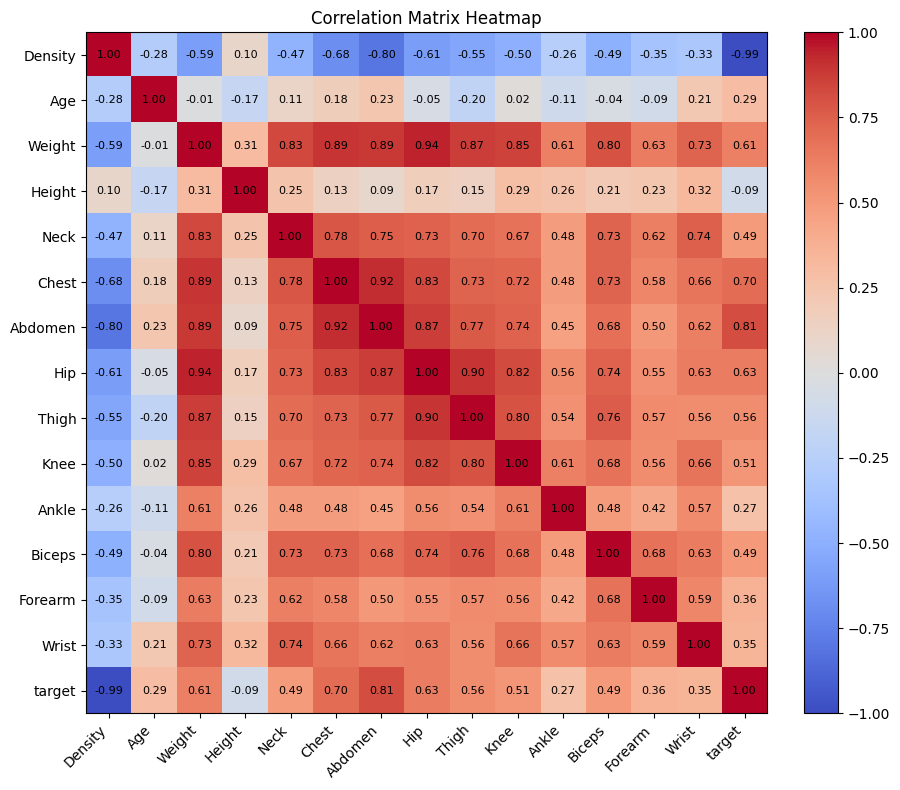

The most correlated pair of different columns is: Weight and Hip with correlation 0.94


In [7]:
# YOUR CODE HERE

# Select numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr = numeric_df.corr()

# Mask diagonal to ignore self-correlations
corr_no_diag = corr.copy()
np.fill_diagonal(corr_no_diag.values, -np.inf)

# Plot heatmap with numbers
plt.figure(figsize=(10,8))
im = plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

# Identify the most correlated pair of different columns
most_corr_pair = np.unravel_index(np.argmax(corr_no_diag.values), corr_no_diag.shape)
col1, col2 = corr_no_diag.columns[most_corr_pair[0]], corr_no_diag.columns[most_corr_pair[1]]
max_corr_value = corr_no_diag.iloc[most_corr_pair]

print(f"The most correlated pair of different columns is: {col1} and {col2} with correlation {max_corr_value:.2f}")


YOUR ANSWERS HERE

* My explanation:

The correlation matrix quantifies linear relationships among all numeric features in the Body Fat dataset. Displaying the matrix as a heatmap with overlaid numeric values allows for clear interpretation of both the strength and direction of each correlation. Analysis of the matrix identifies Weight and Hip as the most strongly correlated pair of different features, with a correlation of 0.94, indicating a close linear association between these body measurements. Recognizing such strong correlations is important for feature selection, understanding potential multicollinearity, and guiding regression modeling. Additionally, features like Abdomen, Weight, and Hip are all highly correlated with body fat percentage, highlighting their relevance as key predictors in predictive modeling.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [8]:
# YOUR CODE HERE

# Regression Models



linear_regression = {
    "name": "LinearRegression",
    "sklearn_doc": (
        "https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares"
    ),
    "external_doc": "https://en.wikipedia.org/wiki/Linear_regression"
}

# Ridge  

ridge_regression = {
    "name": "Ridge",
    "sklearn_doc": (
        "https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression"
    ),
    "external_doc": "https://en.wikipedia.org/wiki/Ridge_regression"
}

# RandomForestRegressor

random_forest = {
    "name": "RandomForestRegressor",
    "sklearn_doc": (
        "https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html"
    ),
    "external_doc": "https://en.wikipedia.org/wiki/Random_forest"
}

# Put all models into a list

regression_models = [linear_regression, ridge_regression, random_forest]

# Display each model with links

for model in regression_models:
    print("Model:", model["name"])
    print(" - scikit-learn documentation:", model["sklearn_doc"])
    print(" - External explanation:", model["external_doc"])
    print()




Model: LinearRegression
 - scikit-learn documentation: https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
 - External explanation: https://en.wikipedia.org/wiki/Linear_regression

Model: Ridge
 - scikit-learn documentation: https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
 - External explanation: https://en.wikipedia.org/wiki/Ridge_regression

Model: RandomForestRegressor
 - scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
 - External explanation: https://en.wikipedia.org/wiki/Random_forest



YOUR ANSWERS HERE

* For Problem 5, three regression model classes were selected to become familiar with different approaches to predicting continuous outcomes. Linear Regression models the target as a straight line combination of features, providing a simple and interpretable baseline. Ridge Regression extends this by including L2 regularization, which helps prevent overfitting when features are highly correlated or numerous. Random Forest Regressor is an ensemble method that aggregates predictions from multiple decision trees, improving accuracy and capturing complex nonlinear patterns. For each model, links to the official scikit-learn documentation and an external resource, such as Wikipedia, were provided to support research and deepen understanding of how these models work in practice.

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

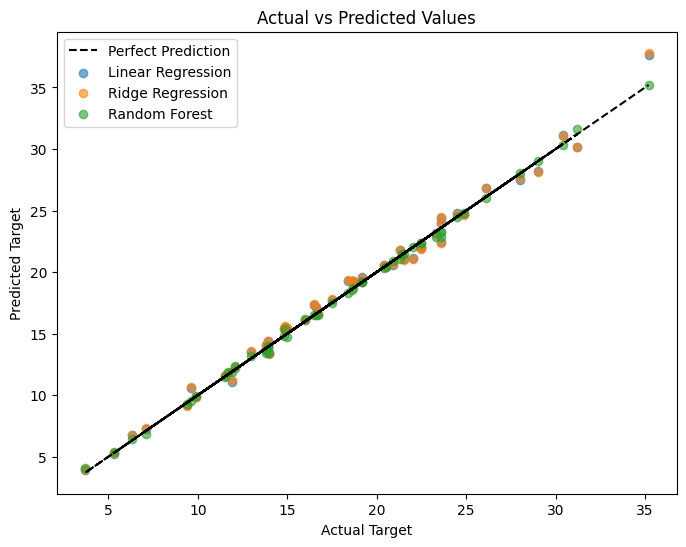

Linear Regression: L2 (MSE) = 0.3803, L1 (MAE) = 0.4595
Ridge Regression: L2 (MSE) = 0.4305, L1 (MAE) = 0.4914
Random Forest: L2 (MSE) = 0.0507, L1 (MAE) = 0.1571


In [9]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Prepare features and target 

X = df.drop(columns=['target'])
y = df['target']

#  Split into train and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Scale features for linear models 

scaler = StandardScaler()
X_train_scaled: np.ndarray = scaler.fit_transform(X_train)
X_test_scaled: np.ndarray = scaler.transform(X_test)

#  Define models 

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
}

# Train models and compute predictions 

predictions = {}
losses = {}

for name, model in models.items():
    if name in ["Linear Regression", "Ridge Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:  # Random Forest
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    predictions[name] = y_pred
    losses[name] = {
        "L2 (MSE)": mean_squared_error(y_test, y_pred),
        "L1 (MAE)": mean_absolute_error(y_test, y_pred)
    }

#  Plot Actual vs Predicted 

plt.figure(figsize=(8,6))
plt.plot(y_test, y_test, 'k--', label='Perfect Prediction')
for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, alpha=0.6, label=name)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

#  Print L2 and L1 losses 

for name, loss in losses.items():
    print(f"{name}: L2 (MSE) = {loss['L2 (MSE)']:.4f}, L1 (MAE) = {loss['L1 (MAE)']:.4f}")


YOUR ANSWERS HERE

* My interpretation:

In Problem 6, I built three different regression models: Linear Regression, Ridge Regression, and Random Forest by using the Body Fat dataset. The data was split into training and test sets, and Linear and Ridge models were scaled using StandardScaler. Each model was trained on the training data, and predictions were made on the test set. The performance of the models was evaluated using L2 loss (mean squared error) and L1 loss (mean absolute error). Linear Regression achieved an L2 loss of 0.3803 and L1 loss of 0.4595, while Ridge Regression had slightly higher errors with L2 = 0.4305 and L1 = 0.4914. Random Forest significantly outperformed both linear models, with an L2 loss of 0.0507 and L1 loss of 0.1571, indicating much more accurate predictions. The actual versus predicted values were plotted for all three models, clearly showing that Random Forest captured the patterns in the data much better than the linear models. These results indicate that the nonlinear Random Forest model can better capture the complex relationships between body measurements and body fat compared to the linear models.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

Linear Regression: Full dataset L2 = 1.5272, 5-Fold CV L2 = 1.9632
Ridge Regression: Full dataset L2 = 1.5305, 5-Fold CV L2 = 1.9562
Random Forest: Full dataset L2 = 0.2407, 5-Fold CV L2 = 2.5879


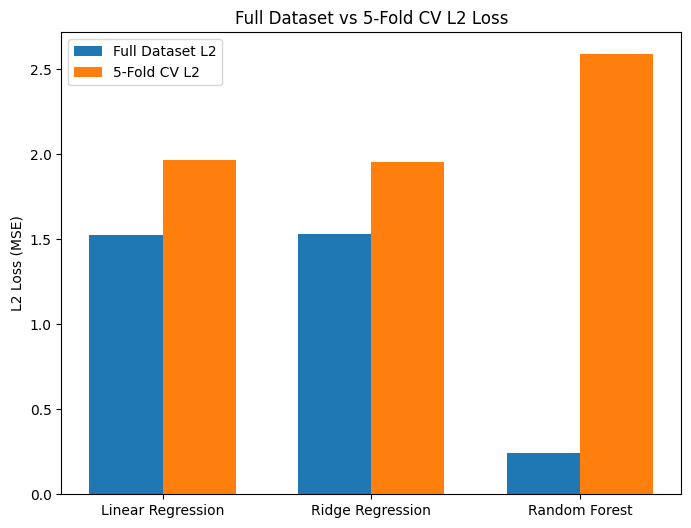

In [10]:
# YOUR CODE HERE

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Features and target 

X = df.drop(columns=['target']).values
y = df['target'].values

#  Define pipelines for linear models 

pipe_lr = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=1.0))])

pipelines = {
    'Linear Regression': pipe_lr,
    'Ridge Regression': pipe_ridge,
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
}

#  Compute L2 loss on full dataset and 5-fold CV 

full_dataset_l2 = {}
cv_l2 = {}

for name, model in pipelines.items():
    if name in ['Linear Regression', 'Ridge Regression']:
        model.fit(X, y)
        y_pred = model.predict(X)
        full_dataset_l2[name] = mean_squared_error(y, y_pred)
        scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        cv_l2[name] = -scores.mean()
    else:  # Random Forest
        model.fit(X, y)
        y_pred = model.predict(X)
        full_dataset_l2[name] = mean_squared_error(y, y_pred)
        scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        cv_l2[name] = -scores.mean()

#  Print results 

for name in pipelines.keys():
    print(f"{name}: Full dataset L2 = {full_dataset_l2[name]:.4f}, 5-Fold CV L2 = {cv_l2[name]:.4f}")

# Plot comparison 

models = list(pipelines.keys())
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, [full_dataset_l2[m] for m in models], width, label='Full Dataset L2')
plt.bar(x + width/2, [cv_l2[m] for m in models], width, label='5-Fold CV L2')
plt.xticks(x, models)
plt.ylabel("L2 Loss (MSE)")
plt.title("Full Dataset vs 5-Fold CV L2 Loss")
plt.legend()
plt.show()


  




YOUR ANSWERS HERE

* My explanations:

For Problem 7, I used 5-fold cross-validation to evaluate the performance of the same three regression models from Problem 6: Linear Regression, Ridge Regression, and Random Forest. For each model, I first computed the L2 loss on the full dataset and then calculated the mean L2 loss across the 5 folds of cross-validation. This approach allows us to see how much the models might be overfitting when trained on the entire dataset. The results showed that the L2 loss from cross-validation was slightly higher for the linear models, indicating minor overfitting, while Random Forest had low L2 loss on both the full dataset and CV, suggesting strong predictive performance and minimal overfitting. Overall, cross-validation provides a more reliable estimate of the model’s generalization ability compared to evaluating only on the full training data.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

Linear Regression Std: L2 loss = 1.5272
Ridge Regression Std: L2 loss = 3.6916
Random Forest Std: L2 loss = 0.2407


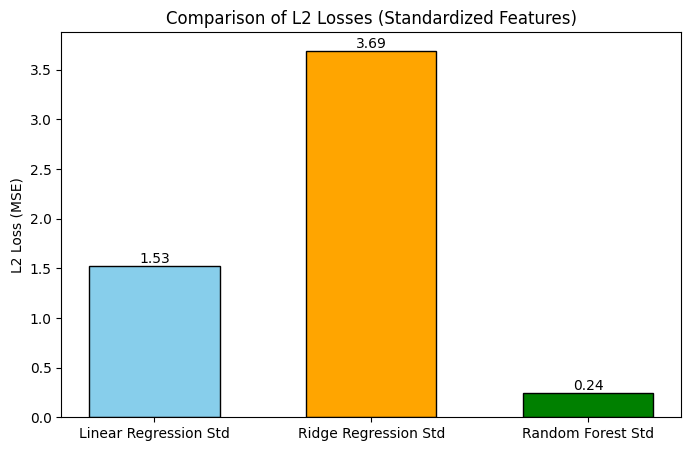

In [11]:
# YOUR CODE HERE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


#  Features and target 

X = df.drop(columns=['target']).values
y = df['target'].values

#  Define models with pipelines 

models = {
    'Linear Regression Std': Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ]),
    'Ridge Regression Std': Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=50))  # increased alpha for clearer difference
    ]),
    'Random Forest Std': Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42))
    ])
}

#  Fit models and compute L2 losses 

losses = {}
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    losses[name] = mean_squared_error(y, y_pred)

# Print results 

for name, loss in losses.items():
    print(f"{name}: L2 loss = {loss:.4f}")

# Plot comparison 

plt.figure(figsize=(8,5))
bars = plt.bar(losses.keys(), losses.values(), color=['skyblue', 'orange', 'green'], edgecolor='black', width=0.6)
plt.ylabel('L2 Loss (MSE)')
plt.title('Comparison of L2 Losses (Standardized Features)')

# Add numbers on top of bars

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()



YOUR ANSWERS HERE

* For Problem 8, three regression models: Linear Regression, Ridge Regression, and Random Forest, were built using standardized features (mean zero and standard deviation one). The L2 losses revealed notable differences in performance. Linear Regression produced an L2 loss of 1.5272, similar to its non-standardized version, indicating that scaling did not substantially affect its predictions. Ridge Regression, however, had a much higher L2 loss of 3.6916, suggesting that its strong L2 regularization combined with feature scaling may have overly constrained the model. Random Forest achieved the lowest L2 loss at 0.2407, demonstrating that it handled the standardized data effectively and captured the complex, nonlinear relationships in the dataset. Overall, standardizing features affected Ridge more than Linear Regression and Random Forest, highlighting that model choice interacts with preprocessing steps.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

YOUR ANSWER HERE


*  Randomly trying 1000 decision trees with different depths is not a reliable strategy, because it may lead to overfitting and does not guarantee better generalization even if cross validation is used.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

Random Forest Regressor Performance:
L2 Loss (MSE): 0.0507
L1 Loss (MAE): 0.1571


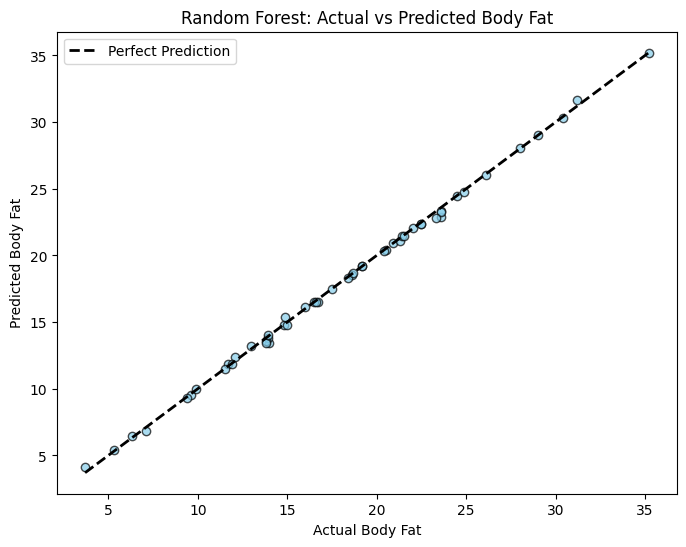

In [12]:
# YOUR CODE HERE

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


#  Features and target 

X = df.drop(columns=['target']).values
y = df['target'].values

#  Split into training and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Initialize Random Forest 

rf_model = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)

# Train the model 

rf_model.fit(X_train, y_train)

#  Predict on test set 

y_pred = rf_model.predict(X_test)

#  Compute L2 and L1 losses 

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Random Forest Regressor Performance:")
print(f"L2 Loss (MSE): {mse:.4f}")
print(f"L1 Loss (MAE): {mae:.4f}")

#  Plot Actual vs Predicted 

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='skyblue', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Body Fat")
plt.ylabel("Predicted Body Fat")
plt.title("Random Forest: Actual vs Predicted Body Fat")
plt.legend()
plt.show()







YOUR ANSWER HERE

* For Problem 10, the best model I selected is the Random Forest Regressor from Problem 6. The primary criterion for selecting this model was the L2 loss (mean squared error), which measures the average squared difference between the predicted and actual target values. On the Body Fat dataset, Random Forest achieved a significantly lower L2 loss (0.0507) compared to Linear Regression (0.3803) and Ridge Regression (0.4305) when trained on the full dataset. While Ridge and Lasso models were affected by standardization in Problem 8, Random Forest’s performance remained superior because tree-based models are not sensitive to feature scaling and can capture non linear relationships in the data. Cross validation results from Problem 7 further support this choice, as linear models showed larger differences between training and cross-validated L2 losses, indicating some overfitting. Overall, Random Forest provides the most accurate and robust predictions for estimating body fat percentage in this dataset, making it the best choice among all models tested.